# K-nearest neighbors

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import auc, confusion_matrix, classification_report, precision_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.utils.multiclass import unique_labels
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data_default = pd.read_csv("default.csv",usecols = [1,2,3,4])
data_default.head(5)

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [3]:
data_default_dummies = pd.get_dummies(data_default, drop_first = True)
print(data_default_dummies.head(5))
np.unique(data_default_dummies.default_Yes, return_counts = True)

       balance       income  default_Yes  student_Yes
0   729.526495  44361.62507            0            0
1   817.180407  12106.13470            0            1
2  1073.549164  31767.13895            0            0
3   529.250605  35704.49394            0            0
4   785.655883  38463.49588            0            0


(array([0, 1], dtype=uint8), array([9667,  333]))

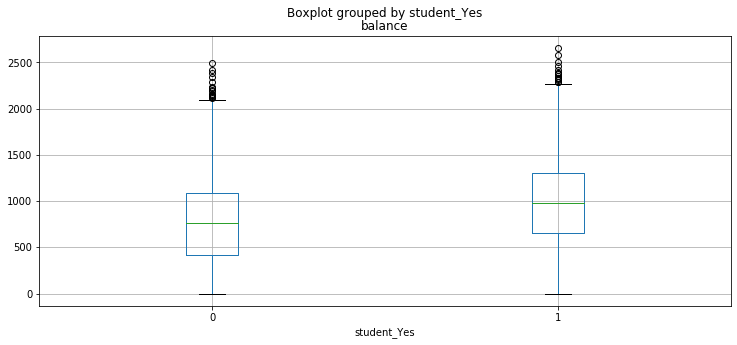

In [4]:
data_default_dummies.boxplot("balance","student_Yes", figsize = (12,5))
plt.show()

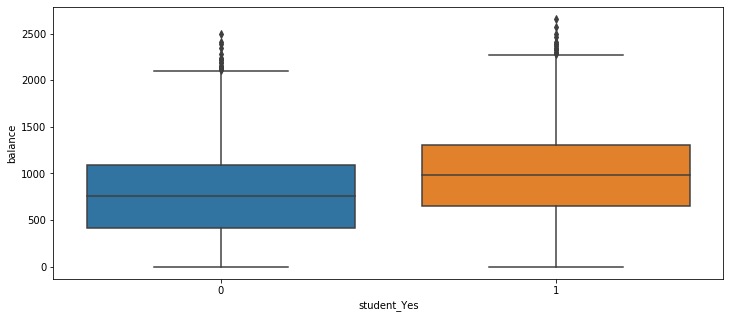

In [5]:
plt.figure(figsize = (12,5))
sns.boxplot(y = "balance", x = "student_Yes", data = data_default_dummies)
plt.show()

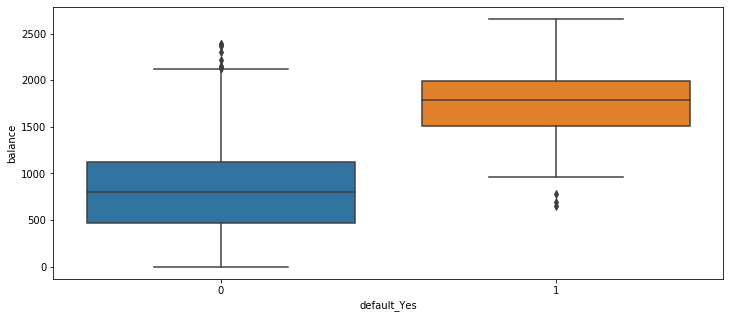

In [6]:
plt.figure(figsize = (12,5))
sns.boxplot(y = "balance", x = "default_Yes", data = data_default_dummies)
plt.show()

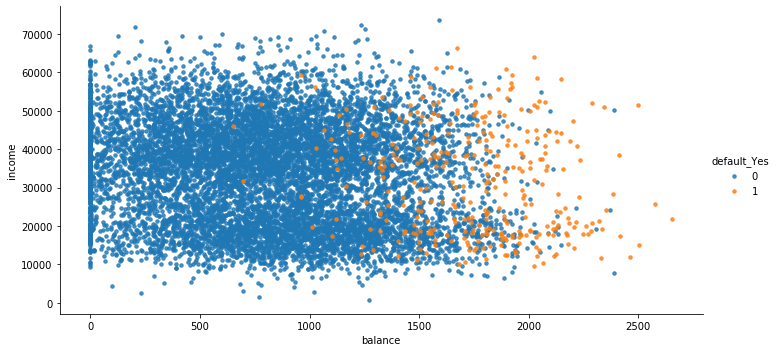

In [7]:
sns.lmplot(y = "income", x = "balance", data = data_default_dummies, 
           hue = 'default_Yes',fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.show()

In [8]:
X = data_default_dummies.drop("default_Yes", axis = 1)
y = data_default_dummies.default_Yes
y = y.values

In [9]:
knn7 = KNeighborsClassifier(7)
mod_knn7 = knn7.fit(X,y)

In [10]:
print(mod_knn7)
print("Model Score: %s" % mod_knn7.score(X,y))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')
Model Score: 0.9729


In [11]:
pred = mod_knn7.predict(X)
pred_prob = mod_knn7.predict_proba(X)

In [12]:
actual = y

In [13]:
print(pred_prob)
np.unique(pred, return_counts = True)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


(array([0, 1], dtype=uint8), array([9904,   96]))

In [14]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [15]:
tn, fp, fn, tp = confusion_matrix(y_true = actual, y_pred = pred, labels = np.array([0,1])).ravel()


In [16]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 9650
False Positives: 17
False Negatives: 254
True Positives: 79


Confusion matrix, without normalization
[[9650   17]
 [ 254   79]]


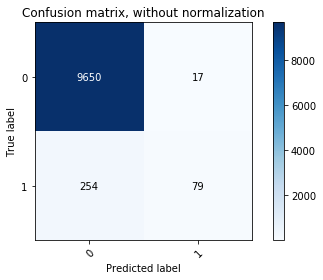

In [17]:
plot_confusion_matrix(y_true = actual, y_pred = pred, classes = np.array([0,1]))
plt.show()

In [18]:
print(classification_report(actual, pred, digits = 6))

              precision    recall  f1-score   support

           0   0.974354  0.998241  0.986153      9667
           1   0.822917  0.237237  0.368298       333

    accuracy                       0.972900     10000
   macro avg   0.898635  0.617739  0.677226     10000
weighted avg   0.969311  0.972900  0.965578     10000



In [19]:
fpr, tpr, thresholds = roc_curve(y_true = actual, y_score = pred_prob[:,0], pos_label = 0)

In [20]:
print("AUC: %s" % auc(fpr,tpr))

AUC: 0.9765559497637701


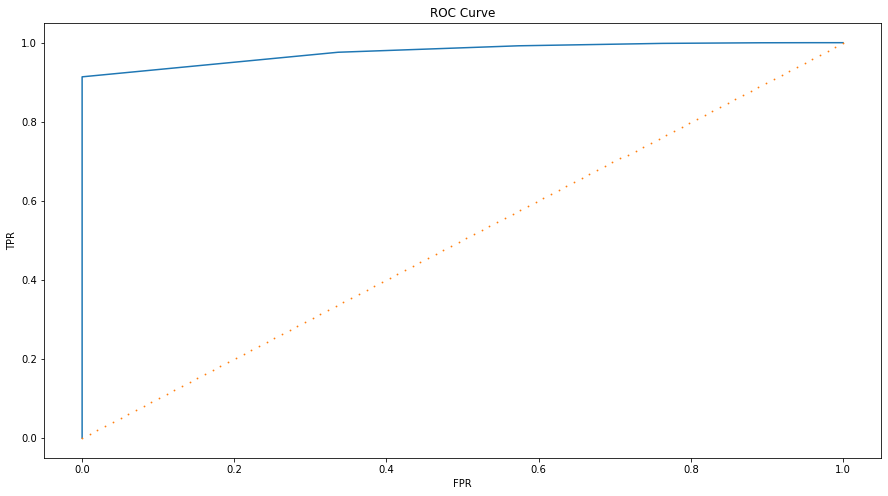

In [21]:
x = np.linspace(0,1,100)
plt.figure(figsize = (15,8)) 

plt.plot(fpr, tpr) 
plt.plot(x,x,".", markersize = 1.6) 

plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")

plt.show()

In [22]:
precision, recall, thresholds = precision_recall_curve(y_true = actual, probas_pred = pred_prob[:,1], pos_label = 1)

In [23]:
print("AUC: %s" % auc(recall,precision))

AUC: 0.6246343277775797


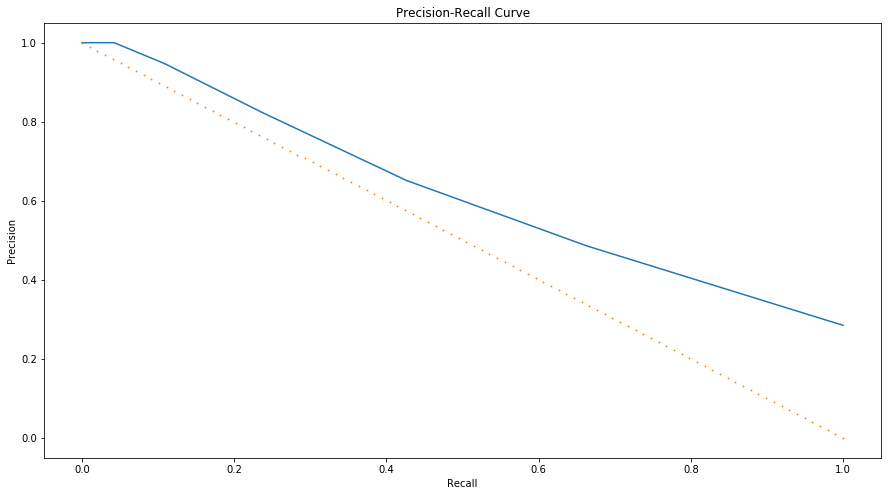

In [24]:
x = np.linspace(0,1,100)
plt.figure(figsize = (15,8)) 

plt.plot(recall, precision) 
plt.plot(x,-x+1,".", markersize = 1.6) 

plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [25]:
average_precision_score(y_true = actual, y_score = pred_prob[:,1])

0.5452467105053292

### Different K values

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [27]:
X_Train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 4)

In [28]:
print("Train feature set shape: %s, Test feature set shape: %s " % (X_Train.shape, X_test.shape))
print("Train set labels shape: %s, Test set labels shape: %s " % (y_train.shape, y_test.shape))

Train feature set shape: (8000, 3), Test feature set shape: (2000, 3) 
Train set labels shape: (8000,), Test set labels shape: (2000,) 


In [29]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_Train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [30]:
y_predicted = knn.predict(X_test)

In [31]:
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [32]:
print("Accuracy: %s" % accuracy_score(y_test,y_predicted))
print(classification_report(y_test, y_predicted, digits = 4))

Accuracy: 0.958
              precision    recall  f1-score   support

           0     0.9743    0.9824    0.9783      1931
           1     0.3585    0.2754    0.3115        69

    accuracy                         0.9580      2000
   macro avg     0.6664    0.6289    0.6449      2000
weighted avg     0.9531    0.9580    0.9553      2000



In [33]:
k = np.arange(1,25)
k_result = []

for val in k:
    knn = KNeighborsClassifier(n_neighbors=val)
    knn.fit(X_Train,y_train)
    y_predict = knn.predict(X_test)
    k_result.append(accuracy_score(y_test,y_predict))
#     print(val,accuracy_score(y_test,y_predict))

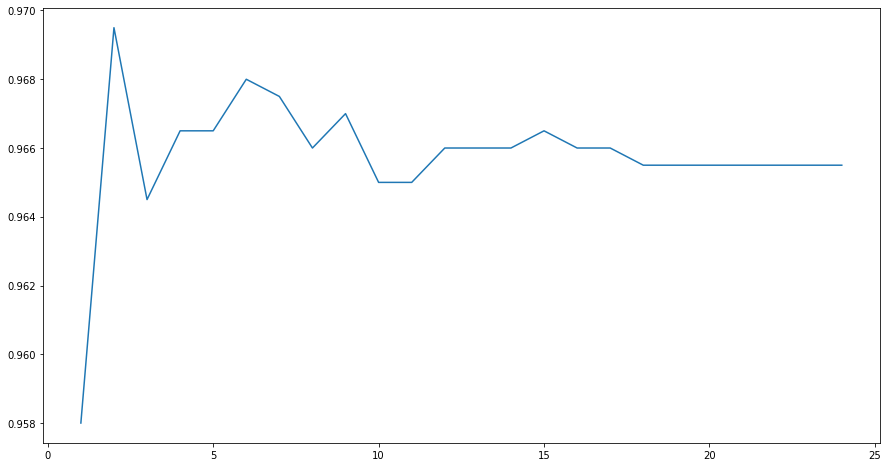

In [34]:
plt.figure(figsize = (15,8)) 
plt.plot(k,k_result)
plt.show()

In [35]:
print("Maximum accuracy score: %s, for k=%s" % (max(k_result), k_result.index(0.9695) + 1))

Maximum accuracy score: 0.9695, for k=2


## Cross Validation

In [36]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [37]:
k = np.arange(1,26)
k_result = []

for val in k:
    knn = KNeighborsClassifier(n_neighbors=val)
    kfold = KFold(n_splits=10)
    score = cross_val_score(knn, X_Train, y_train, cv = kfold, scoring = "accuracy")
    k_result.append(score)
#     print(val, max(score), score)

In [38]:
k_result

[array([0.97   , 0.955  , 0.95375, 0.95125, 0.96   , 0.9525 , 0.945  ,
        0.95375, 0.95875, 0.95125]),
 array([0.975  , 0.9675 , 0.97   , 0.96375, 0.97   , 0.96375, 0.96   ,
        0.965  , 0.97375, 0.96875]),
 array([0.9725 , 0.965  , 0.9675 , 0.9575 , 0.96125, 0.96   , 0.96125,
        0.9675 , 0.97375, 0.96625]),
 array([0.97625, 0.97125, 0.96875, 0.96375, 0.96875, 0.96375, 0.96125,
        0.96625, 0.9725 , 0.9725 ]),
 array([0.97625, 0.96875, 0.965  , 0.9625 , 0.96875, 0.96375, 0.96125,
        0.965  , 0.97125, 0.9675 ]),
 array([0.975  , 0.97125, 0.96625, 0.96   , 0.97   , 0.96625, 0.96   ,
        0.965  , 0.97125, 0.9725 ]),
 array([0.97625, 0.97125, 0.965  , 0.9625 , 0.9675 , 0.96625, 0.96125,
        0.96625, 0.9725 , 0.96875]),
 array([0.975  , 0.97   , 0.9675 , 0.9625 , 0.97125, 0.965  , 0.96   ,
        0.96375, 0.97125, 0.9725 ]),
 array([0.97625, 0.97   , 0.965  , 0.9625 , 0.9725 , 0.96375, 0.95875,
        0.96375, 0.97   , 0.97125]),
 array([0.975  , 0.97   , 0.

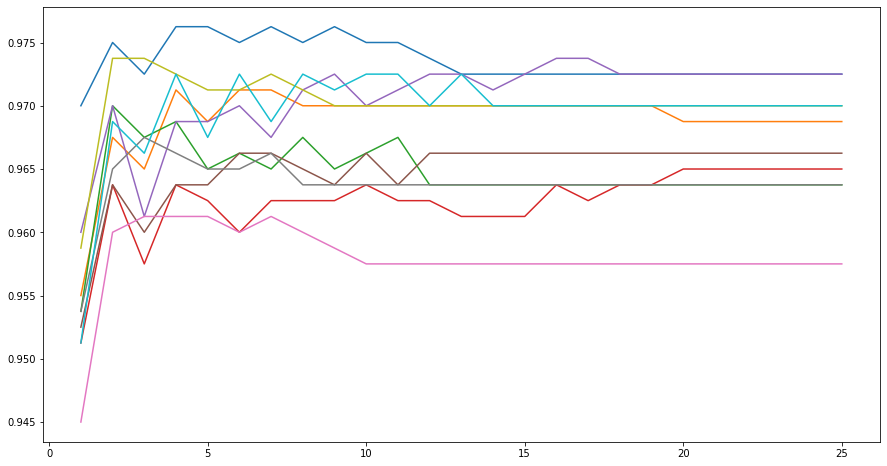

In [39]:
plt.figure(figsize = (15,8)) 
plt.plot(k,k_result)
plt.show()

In [40]:
np.mean(np.array(k_result))

0.96667

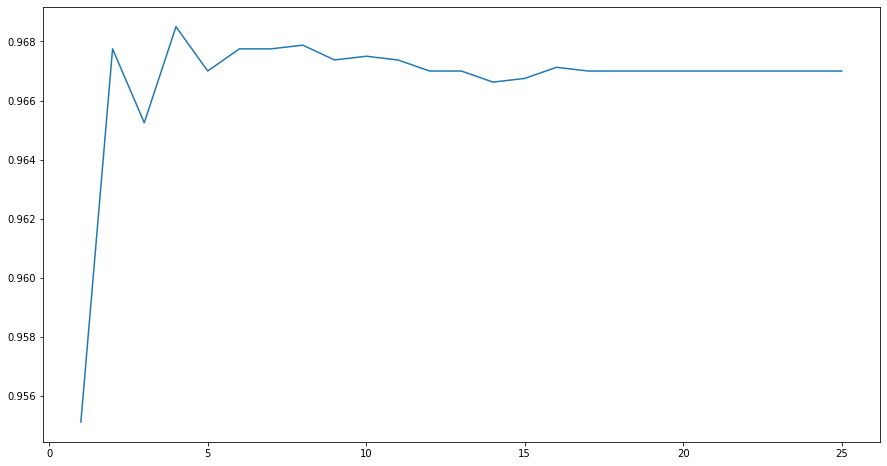

In [41]:
plt.figure(figsize = (15,8)) 
plt.plot(k,np.mean(np.array(k_result), axis = 1))
plt.show()

In [42]:
avg_cv_scores = np.mean(np.array(k_result), axis = 1)

In [43]:
avg_cv_scores

array([0.955125, 0.96775 , 0.96525 , 0.9685  , 0.967   , 0.96775 ,
       0.96775 , 0.967875, 0.967375, 0.9675  , 0.967375, 0.967   ,
       0.967   , 0.966625, 0.96675 , 0.967125, 0.967   , 0.967   ,
       0.967   , 0.967   , 0.967   , 0.967   , 0.967   , 0.967   ,
       0.967   ])

In [44]:
max_avg_accuracy_index = np.argmax(avg_cv_scores)

In [45]:
print("Optimal Value of K: %s" % max_avg_accuracy_index)

Optimal Value of K: 3


In [46]:
knn_optimal = KNeighborsClassifier(n_neighbors = max_avg_accuracy_index)
knn_optimal.fit(X,y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [47]:
y_pred = knn_optimal.predict(X)

In [48]:
print(classification_report(y, y_pred, digits = 6))

              precision    recall  f1-score   support

           0   0.981455  0.996379  0.988861      9667
           1   0.811828  0.453453  0.581888       333

    accuracy                       0.978300     10000
   macro avg   0.896642  0.724916  0.785375     10000
weighted avg   0.975806  0.978300  0.975309     10000

